In [23]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
import numpy as np
import pandas as pd

import random
import plotly.express as plt

import cv2

img1ScaleGray = cv2.imread('data/placa_1.jpg',0)
img2ScaleGray = cv2.imread('data/placa_2.jpg',0)
img3ScaleGray = cv2.imread('data/placas.jpg',0)

image3 = cv2.imread('data/placas.jpg')


In [24]:
img1 = tf.Variable(img1ScaleGray)
img2 = tf.Variable(img2ScaleGray)
img3 = tf.Variable(img3ScaleGray)

tam1 = img1.shape
tam2 = img2.shape
tam3 = img3.shape




In [25]:
def distanciaMinkoski(x,y,p):
    tam = y.shape
    soma = 0

    result = 0
    for i in range(tam[0]):
        for j in range(tam[1]):
            soma = np.add(  soma , np.power( x[i][j] - y[i][j],p))
           
    
    result = np.power(soma,1/p)

    print(result)
    return result


        


In [26]:
def functionA(imagem,template):
    tm1 = template.shape
    tm2 = imagem.shape 
    eixoX = tm2[0] - tm1[0] + 1
    eixoY = tm2[1] - tm1[1] + 1
    diff = np.zeros(shape=(eixoX,eixoY))
    
    for i in range(eixoX):
        for j in range(eixoY):
            diff1 = np.subtract(imagem[i:(i+tm1[0]), j:(j+tm1[1])], template)  #Matriz de distancia
            diff[i,j] = (diff1.mean())
            
    
    return diff
    

In [27]:
diff = functionA(img3,img1)
diff

array([[122.55748547, 123.14825581, 123.75697674, ..., 134.9778343 ,
        135.73844477, 135.7462936 ],
       [122.51947674, 122.83859012, 122.81889535, ..., 135.75813953,
        136.20327035, 136.24898256],
       [122.29113372, 121.8255814 , 122.87899709, ..., 136.46388081,
        136.05857558, 136.5377907 ],
       ...,
       [130.79920058, 130.49796512, 130.72456395, ..., 140.92398256,
        141.72565407, 141.22957849],
       [130.32034884, 130.17710756, 130.36627907, ..., 141.97143895,
        142.440625  , 141.93764535],
       [129.4315407 , 129.2318314 , 129.52674419, ..., 142.42957849,
        143.38393895, 142.89367733]])

In [28]:
diffImage2 = functionA(img3,img2)

In [29]:
diff1Image1 = tf.convert_to_tensor(diff)
diff1Image2 = tf.convert_to_tensor(diffImage2)

In [30]:
xImage1 = np.unravel_index(diff.argmin(), diff.shape)
xImage2 = np.unravel_index(diffImage2.argmin(), diffImage2.shape)



In [31]:
import matplotlib.pyplot as mplt

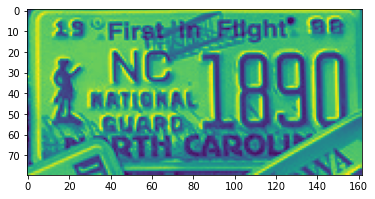

In [32]:
mplt.imshow(img2ScaleGray)

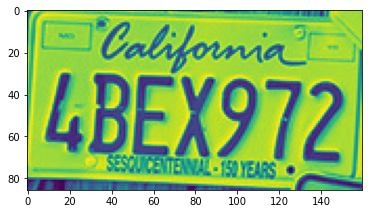

In [33]:
mplt.imshow(img1ScaleGray)

In [34]:
def function2(imagem3F,x,tam):
    for i in np.arange(x[0],x[0]+tam[0]):
        imagem3F[i,x[1]-1] = 255
        imagem3F[i, x[1]] = 255
        imagem3F[i,x[1]+1] = 255

    for i in np.arange(x[0],x[0]+tam[0]):
        imagem3F[i, x[1] + tam[1]] = 255
        imagem3F[i, x[1] + tam[1] -1] = 255
        imagem3F[i, x[1] + tam[1]+1] = 255

    for j in np.arange(x[1],x[1]+ tam[1]):
        imagem3F[x[0],j] = 255
        imagem3F[x[0]-1,j] = 255
        imagem3F[x[0]+1,j] = 255

    for j in np.arange(x[1],x[1]+ tam[1]):
        imagem3F[x[0] + tam[0],j] = 255
        imagem3F[x[0] + tam[0]-1,j] = 255
        imagem3F[x[0] + tam[0]+1,j] = 255
    
    return imagem3F

imagemFinal = img3ScaleGray
imagemFinal = function2(img3ScaleGray,xImage1,tam1)
imagemFinal = function2(imagemFinal,xImage2,tam2)

In [35]:
xImage1,xImage2


((264, 86), (158, 393))

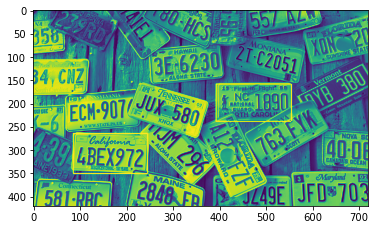

In [36]:
mplt.imshow(imagemFinal)

In [37]:
import plotly.io as pio

pio.renderers;

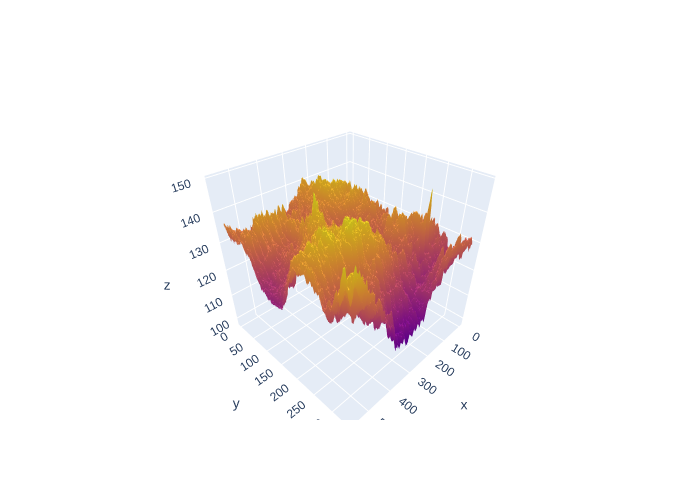

In [42]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Surface(z=diff, showscale=False))

fig.show(renderer="png")

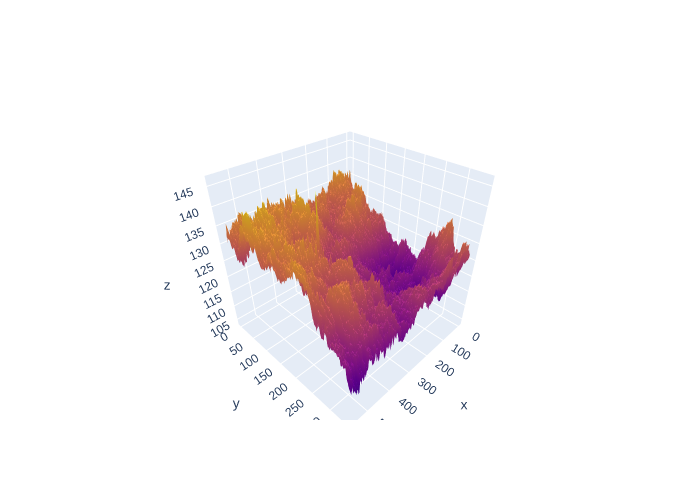

In [44]:
fig2 = go.Figure(data=go.Surface(z=diffImage2, showscale=False))
fig2.show(renderer="png");

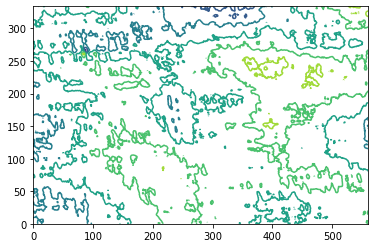

In [40]:
mplt.contour(diff)

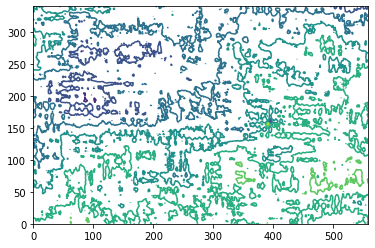

In [41]:
mplt.contour(diffImage2)